<a href="https://colab.research.google.com/github/annsyj94/Data_Analytics_Portfolio/blob/main/15_Kakao_Corp_%EC%A3%BC%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kakao Corp 주식

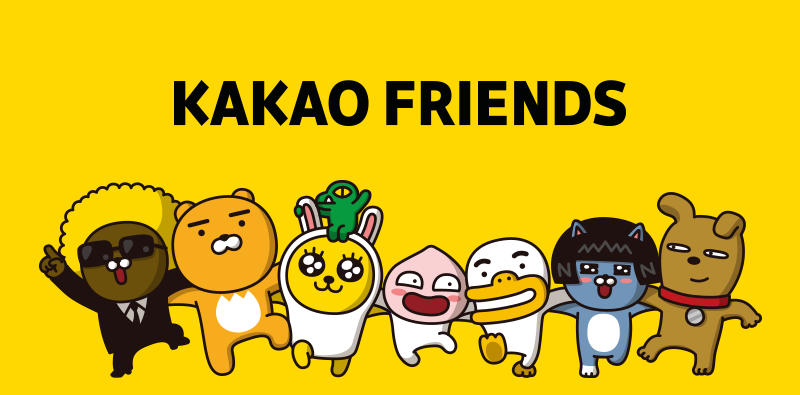

목표 
- 'FinanceDataReader' 금융 데이터 수집 라이브러리로 원하는 카카오 주식 불러오기 
- Facebook Prophet으로 간단하게 예측모델 만들기 ( 페이스북에서 만든 시계열 예측 라이브러리)

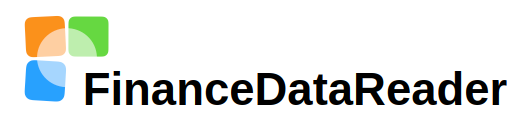

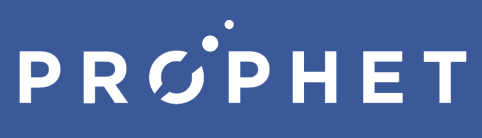

In [ ]:
#Finance Data Reader 다운로드 실행하기 
! pip install finance-datareader

In [ ]:
#Facebook Prophet 다운로드 실행하기 
pip install fbprophet

In [1]:
# 라이브러리 불러우기 
import FinanceDataReader as fdr
import pandas as pd
from fbprophet import Prophet


# '카카오'2022년 1월부터 현재 가격 가져오기 
df = fdr.DataReader('035720','2022')
df.reset_index()

df.head(5)


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,113500,117000,113000,114500,1846049,0.017778
2022-01-04,114000,114500,111000,111500,2396207,-0.026201
2022-01-05,111000,111000,105000,105500,5108428,-0.053812
2022-01-06,102500,103000,99900,100000,7120428,-0.052133
2022-01-07,100000,101500,99800,100000,3962672,0.000000


In [20]:
#Open(시초가), Close(주가)를 가져오기 

df2 = fdr.DataReader('035720','2022')[['Open','Close']]
df2.head(5)

,Open,Close
Date,,
2022-01-03,113500,114500
2022-01-04,114000,111500
2022-01-05,111000,105500
2022-01-06,102500,100000
2022-01-07,100000,100000


In [2]:
# 차트 설정하기 
%matplotlib inline 

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

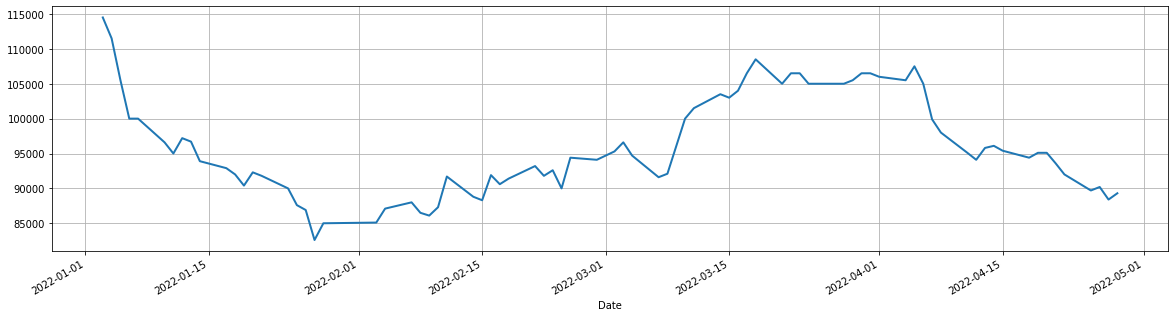

In [4]:
# 카카오, 2022년~현재간의 시계열 차트 
df['Close'].plot()

In [3]:
# 2022년 1월부터 현재간의 카카오 캔들차트 
fdr.chart.plot(df, title = "카카오")

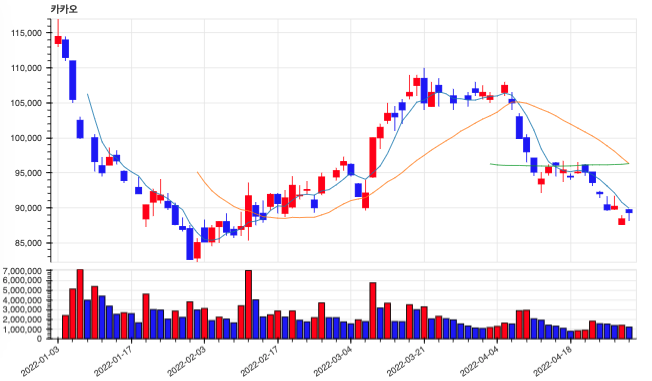

In [4]:
# 캔들차트 설정하기 
fdr.chart.config(title ="카카오")
fdr.chart.config(width=600, height = 300)
fdr.chart.config (volume = False)

fdr.chart.plot(df)

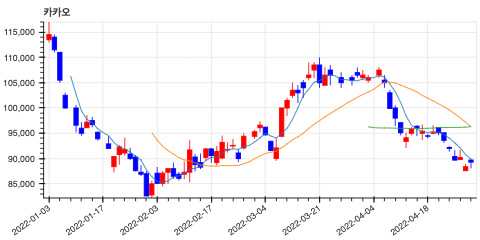

In [5]:
import plotly.graph_objects as go 


#실시간 (1월부터 4월까지) 카카오 캔들차트 만들기 

graph = {
    'x' : df.index, 
    'open' : df.Open,
    'close' : df.Close,
    'high' : df.High, 
    'low' : df.Low, 
    'type': 'candlestick', 
    'name' : 'Ethereum',
    'showlegend': True
}

layout = go.Figure (
    data = [graph],
    layout_title = 'Ethereum'
)

layout

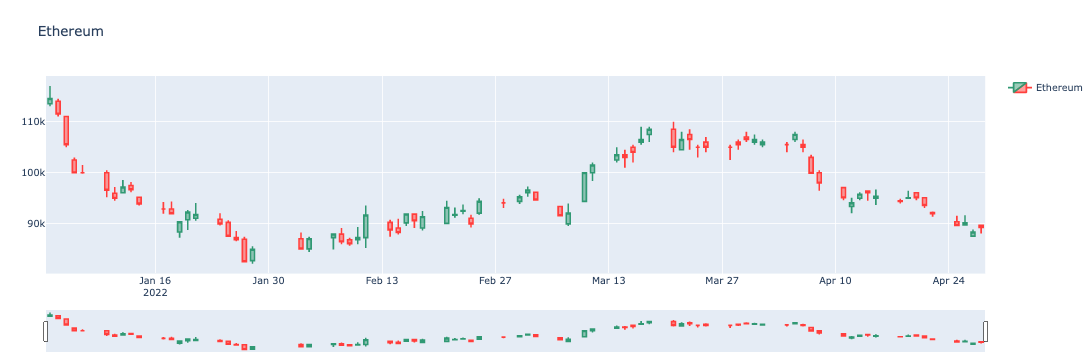

Facebook Propet은 ds(Date)와 y(Open) 사용만 가능하다. 데이터 Date와 Open을 가져와서 이름을 바꾼다 

In [9]:
#인덱스 재설정하기 
df.reset_index(inplace=True)

#df에서 Date와 Open만 가져오기 
df4 = df[["Date","Open"]]


#이름 바꾸기 
new_names = {
    "Date":"ds",
    "Open":"y",
}

#행 이름 바꾸기 
df4.rename(columns = new_names, inplace=True)

df4.tail()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
74,2022-04-22,92200
75,2022-04-25,90400
76,2022-04-26,89800
77,2022-04-27,87600
78,2022-04-28,89700


In [10]:
#실시간 시계열 만들기 (Plotly을 통해서 )

x = df4["ds"]
y = df4["y"]

fig = go.Figure()

fig.add_trace(go.Scatter(x=x,y=y))

fig.update_layout(title_text="Time series plot of Ethereum Open Price")


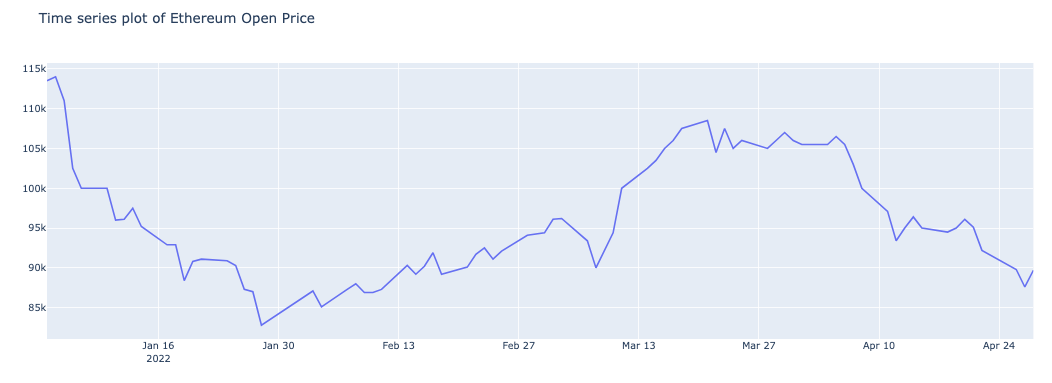

In [11]:
# 모델을 정의하고 목적에 맞게 조정한 다음에 데이터 프레임에 적합하게 설정하기
m = Prophet (seasonality_mode = "multiplicative",
             yearly_seasonality=True,
             weekly_seasonality=True, daily_seasonality=True,
             changepoint_prior_scale=0.5)

m.fit(df4)

In [12]:
# 예측 모델을 위해 1년치 날짜 데이터를 만들어내기 
future_data = m.make_future_dataframe(periods = 5, freq='d')
forecast = m.predict(future_data)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
79,2022-04-29,88387.862557,87168.846562,89634.858616
80,2022-04-30,68246.893909,66709.710850,69693.286414
81,2022-05-01,69985.381604,67512.311319,72283.907477
82,2022-05-02,94328.235125,89109.360512,99635.809640
83,2022-05-03,98337.547161,90064.711919,106548.573130


In [15]:
from datetime import datetime
from datetime import timedelta
from fbprophet.plot import plot_plotly, plot_components_plotly


#다음날의 가격 예측얻기 

next_day = (datetime.today() + timedelta(days=1)).strftime('%Y-%m-%d')
forecast[forecast['ds'] == next_day]['yhat'].item()

88387.86255733232

In [16]:
#실시간 시계열 예측 
plot_plotly(m, forecast)

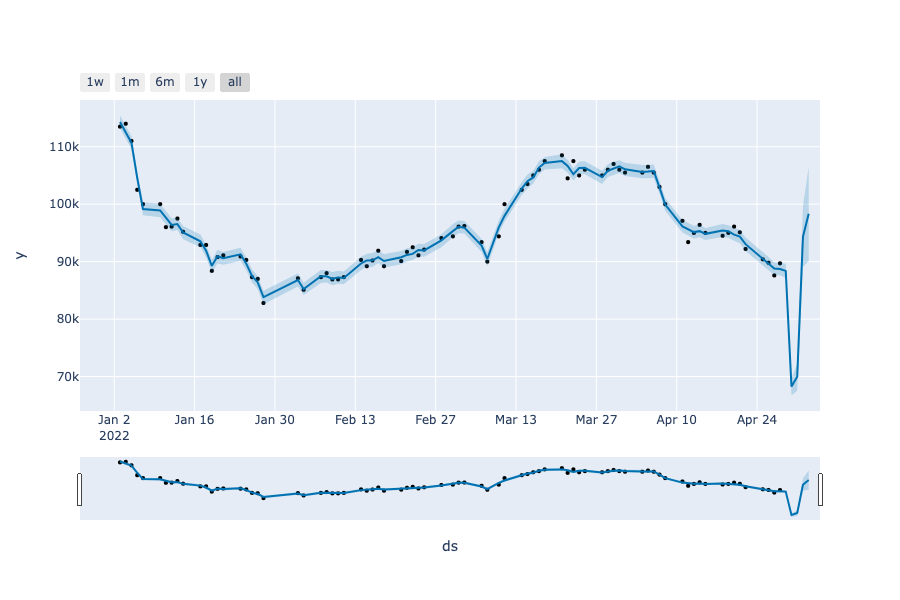

In [17]:
# 성장 곡선 추세, 주간 계절 및 연간 계절 구성 요소 시각화 
plot_components_plotly(m, forecast)

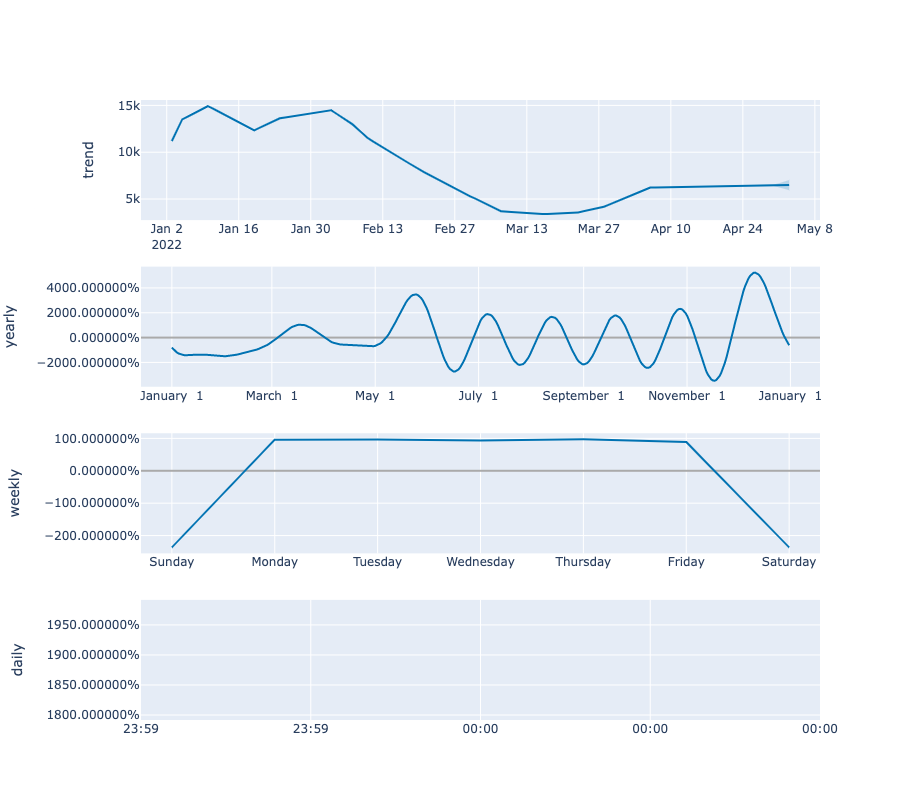

# 결과 

카카오 주식이 4월 30일날에 떨어질 것이자만 , 5월 3일에 주식이 오를 것이다. 